In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('diabetes.csv')

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
#Check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [130]:
#Check how many are zeros
column_names = df.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df[df[name] == 0])))

#Zeros in pregnancies, age, diabetes pedigree function, and outcome should be fine

Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 5
Number of zeros in BloodPressure = 35
Number of zeros in SkinThickness = 227
Number of zeros in Insulin = 374
Number of zeros in BMI = 11
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


In [131]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [135]:
#after dropping skin thick = 0 and before substituting
temp = df[df['SkinThickness'] != 0] 


In [121]:
temp = df[df['Insulin'] == 0]
temp[temp['Outcome'] == 1].shape

(138, 9)

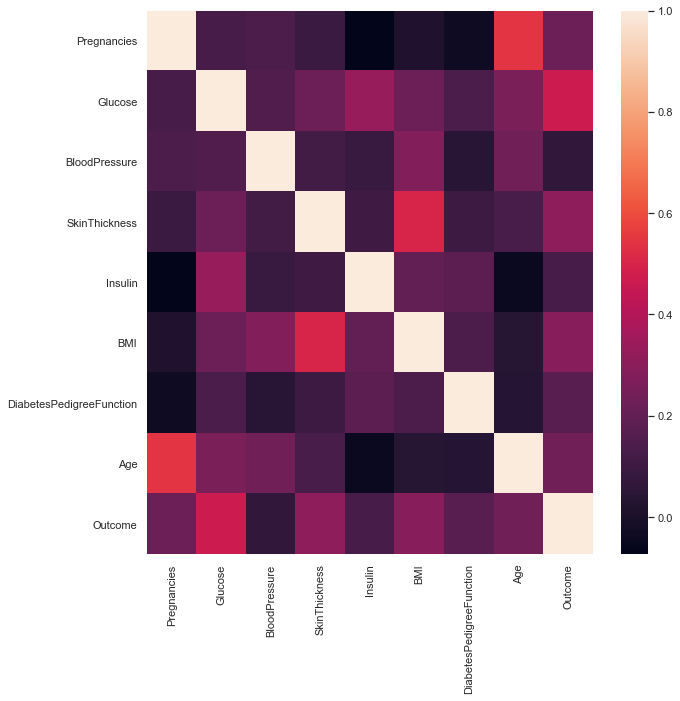

In [124]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(12,12)})


#Note:
# Drop all glucose

(array([395.,  92.,  88.,  67.,  51.,  19.,  18.,  12.,   4.,   4.,   2.,
          7.,   4.,   1.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 <a list of 20 Patch objects>)

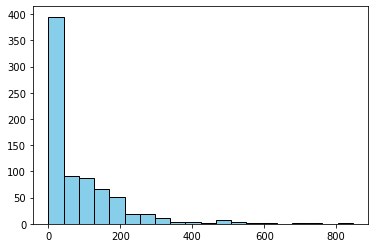

In [35]:
plt.hist(df['Insulin'], bins = 20, ec="black", color = "skyblue")



Text(0.5, 1.0, 'Age')

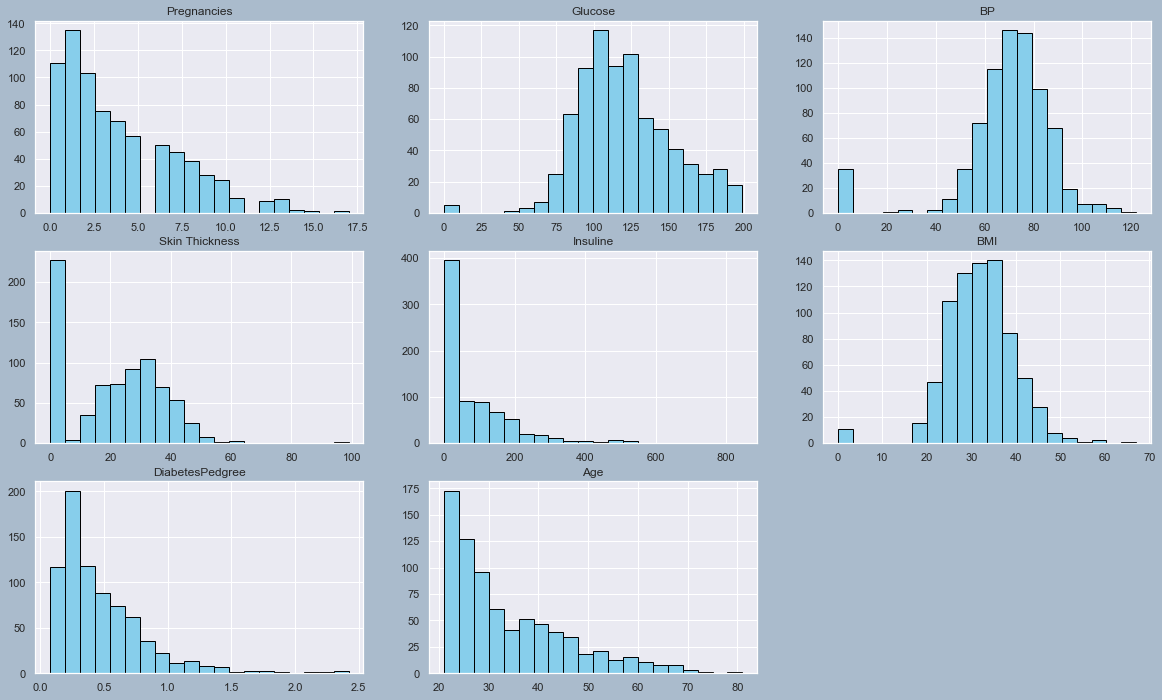

In [136]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

f1 = fig.add_subplot(grid[0,0])
f2 = fig.add_subplot(grid[0,1])
f3 = fig.add_subplot(grid[0,2])
f4 = fig.add_subplot(grid[1,0])
f5 = fig.add_subplot(grid[1,1])
f6 = fig.add_subplot(grid[1,2])
f7 = fig.add_subplot(grid[2,0])
f8 = fig.add_subplot(grid[2,1])


fig.patch.set_facecolor("#aabbcc")

f1.hist(df['Pregnancies'], bins = 20, ec="black", color = "skyblue")
f1.set_title("Pregnancies")
f2.hist(df['Glucose'], bins = 20, ec="black", color = "skyblue")
f2.set_title("Glucose")
f3.hist(df['BloodPressure'], bins = 20, ec="black", color = "skyblue")
f3.set_title("BP")
f4.hist(df['SkinThickness'], bins = 20, ec="black", color = "skyblue")
f4.set_title("Skin Thickness")
f5.hist(df['Insulin'], bins = 20, ec="black", color = "skyblue")
f5.set_title("Insuline")
f6.hist(df['BMI'], bins = 20, ec="black", color = "skyblue")
f6.set_title("BMI")
f7.hist(df['DiabetesPedigreeFunction'], bins = 20, ec="black", color = "skyblue")
f7.set_title("DiabetesPedgree")
f8.hist(df['Age'], bins = 20, ec="black", color = "skyblue")
f8.set_title("Age")


Text(0.5, 1.0, 'Age')

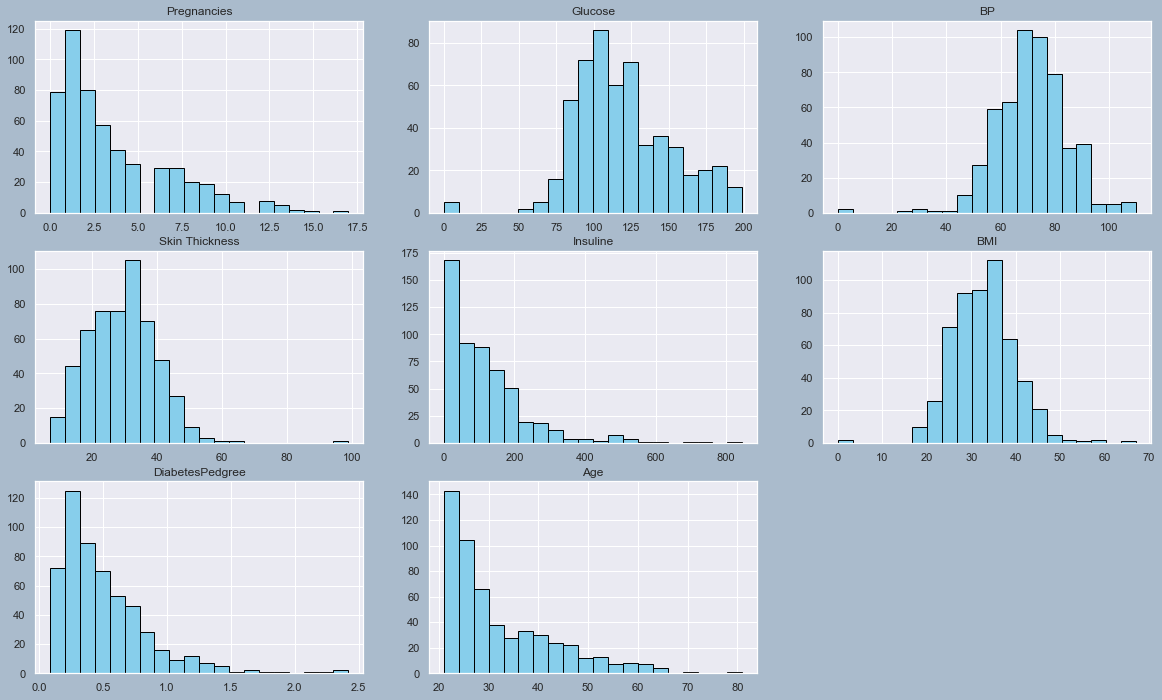

In [137]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

f1 = fig.add_subplot(grid[0,0])
f2 = fig.add_subplot(grid[0,1])
f3 = fig.add_subplot(grid[0,2])
f4 = fig.add_subplot(grid[1,0])
f5 = fig.add_subplot(grid[1,1])
f6 = fig.add_subplot(grid[1,2])
f7 = fig.add_subplot(grid[2,0])
f8 = fig.add_subplot(grid[2,1])


fig.patch.set_facecolor("#aabbcc")

f1.hist(temp['Pregnancies'], bins = 20, ec="black", color = "skyblue")
f1.set_title("Pregnancies")
f2.hist(temp['Glucose'], bins = 20, ec="black", color = "skyblue")
f2.set_title("Glucose")
f3.hist(temp['BloodPressure'], bins = 20, ec="black", color = "skyblue")
f3.set_title("BP")
f4.hist(temp['SkinThickness'], bins = 20, ec="black", color = "skyblue")
f4.set_title("Skin Thickness")
f5.hist(temp['Insulin'], bins = 20, ec="black", color = "skyblue")
f5.set_title("Insuline")
f6.hist(temp['BMI'], bins = 20, ec="black", color = "skyblue")
f6.set_title("BMI")
f7.hist(temp['DiabetesPedigreeFunction'], bins = 20, ec="black", color = "skyblue")
f7.set_title("DiabetesPedgree")
f8.hist(temp['Age'], bins = 20, ec="black", color = "skyblue")
f8.set_title("Age")


### Skin Thickness - based on outcome 0 and 1

In [91]:
skinThick_without_zeros = df[df['SkinThickness'] != 0]

In [92]:
skinThick_without_zeros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [96]:
#We used mean because we saw that the distribution plot os skin thickness was NOT skewed

skin_outcome_0 = skinThick_without_zeros[skinThick_without_zeros['Outcome'] == 0]['SkinThickness'].mean()

In [98]:
skin_outcome_1 = skinThick_without_zeros[skinThick_without_zeros['Outcome'] == 1]['SkinThickness'].mean()

In [99]:
skin_outcome_1

33.0

In [100]:
skin_outcome_0

27.235457063711912

In [112]:
df.shape

(768, 9)

In [113]:
for i in range(0, 768):
    if df['SkinThickness'].iloc[i] == 0 and df['Outcome'].iloc[i] ==0:
        df['SkinThickness'].iloc[i] = skin_outcome_0
    if df['SkinThickness'].iloc[i] == 0 and df['Outcome'].iloc[i] ==1:
        df['SkinThickness'].iloc[i] = skin_outcome_1

/Users/adityaparvatepatil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [116]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,33.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0
764,2,122,70,27.0,0,36.8,0.340,27,0
765,5,121,72,23.0,112,26.2,0.245,30,0
766,1,126,60,33.0,0,30.1,0.349,47,1


In [276]:
#We did include rows where BMI and Glucose were 0 because there are not enough number of these rows that can skew the 
#entire distribution 


df_imputer = df.copy(deep =True)
df_imputer = df_imputer[df_imputer['BMI'] != 0]
df_imputer = df_imputer[df_imputer['Glucose'] != 0]

In [277]:
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [278]:
df_imputer['SkinThickness'] = df_imputer['SkinThickness'].replace(0,np.nan)
df_imputer['Insulin'] = df_imputer['Insulin'].replace(0,np.nan)
df_imputer['Glucose'] = df_imputer['Glucose'].replace(0,np.nan)
df_imputer['BloodPressure'] = df_imputer['BloodPressure'].replace(0,np.nan)

In [279]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0)
temp = imp.fit_transform(df_imputer)
df_imputer = pd.DataFrame(temp)

In [280]:
df_imputer.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.000000,218.666626,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.738265,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.532888,268.732425,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [281]:
df_imputer.columns = df.columns

In [282]:
df_imputer.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.209310,0.101982,0.064365,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.227848,0.239762,0.696663,0.232771,0.133945,0.261490,0.494190
BloodPressure,0.209310,0.227848,1.000000,0.241123,0.136336,0.294019,0.003473,0.328173,0.169531
SkinThickness,0.101982,0.239762,0.241123,1.000000,0.246546,0.705360,0.123347,0.145848,0.274951
Insulin,0.064365,0.696663,0.136336,0.246546,1.000000,0.271110,0.134838,0.206407,0.356983
BMI,0.018352,0.232771,0.294019,0.705360,0.271110,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.003473,0.123347,0.134838,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.328173,0.145848,0.206407,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.169531,0.274951,0.356983,0.309884,0.178052,0.232734,1.000000


Text(0.5, 1.0, 'Age')

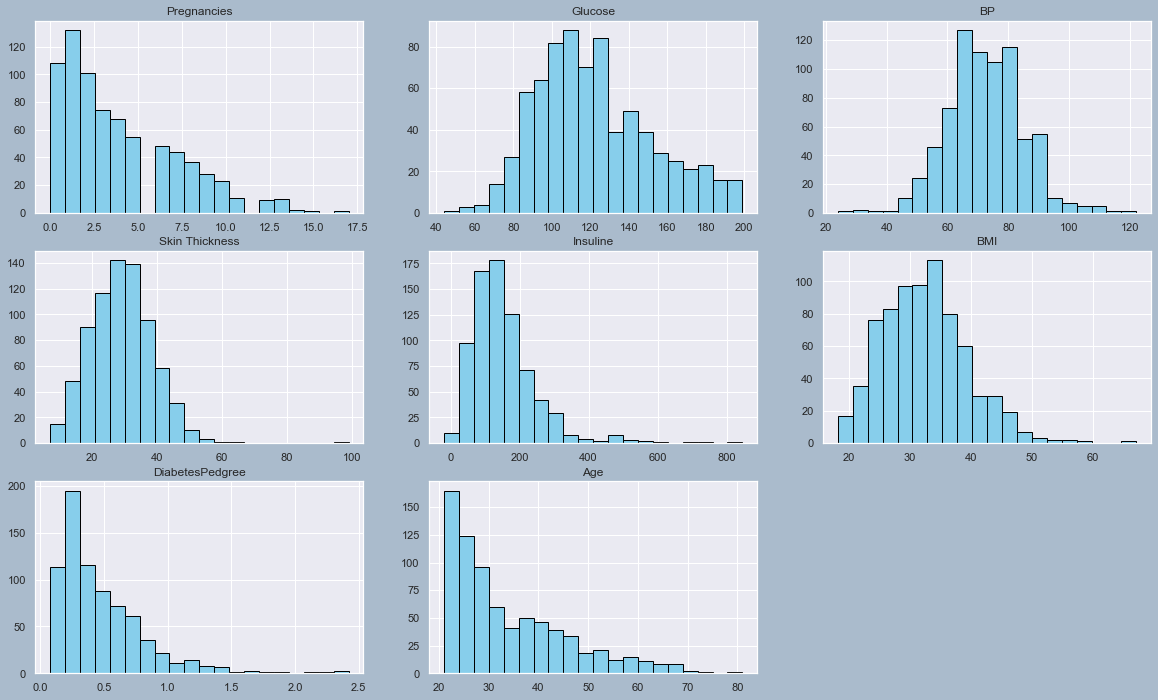

In [283]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

f1 = fig.add_subplot(grid[0,0])
f2 = fig.add_subplot(grid[0,1])
f3 = fig.add_subplot(grid[0,2])
f4 = fig.add_subplot(grid[1,0])
f5 = fig.add_subplot(grid[1,1])
f6 = fig.add_subplot(grid[1,2])
f7 = fig.add_subplot(grid[2,0])
f8 = fig.add_subplot(grid[2,1])


fig.patch.set_facecolor("#aabbcc")

f1.hist(df_imputer['Pregnancies'], bins = 20, ec="black", color = "skyblue")
f1.set_title("Pregnancies")
f2.hist(df_imputer['Glucose'], bins = 20, ec="black", color = "skyblue")
f2.set_title("Glucose")
f3.hist(df_imputer['BloodPressure'], bins = 20, ec="black", color = "skyblue")
f3.set_title("BP")
f4.hist(df_imputer['SkinThickness'], bins = 20, ec="black", color = "skyblue")
f4.set_title("Skin Thickness")
f5.hist(df_imputer['Insulin'], bins = 20, ec="black", color = "skyblue")
f5.set_title("Insuline")
f6.hist(df_imputer['BMI'], bins = 20, ec="black", color = "skyblue")
f6.set_title("BMI")
f7.hist(df_imputer['DiabetesPedigreeFunction'], bins = 20, ec="black", color = "skyblue")
f7.set_title("DiabetesPedgree")
f8.hist(df_imputer['Age'], bins = 20, ec="black", color = "skyblue")
f8.set_title("Age")


In [244]:
type(df_imputer['SkinThickness'].iloc[0])

numpy.float64

In [257]:
df_imputer['Insulin'] = df_imputer['Insulin'].replace(0,np.nan)

In [265]:
df_imputer[df_imputer['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [258]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0)
temp = imp.fit_transform(df_imputer)
df_imputer = pd.DataFrame(temp)

In [260]:
df_imputer.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.00000,218.666626,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,70.738265,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.91019,268.817141,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [261]:
df_imputer.columns = df.columns

In [262]:
df_imputer.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125717,0.152768,0.103546,0.062954,0.018352,-0.029159,0.545238,0.213371
Glucose,0.125717,1.000000,0.138648,0.243548,0.695696,0.232771,0.133945,0.261490,0.494190
BloodPressure,0.152768,0.138648,1.000000,0.163162,0.030501,0.192729,0.019738,0.224820,0.050964
SkinThickness,0.103546,0.243548,0.163162,1.000000,0.248095,0.705046,0.121840,0.148358,0.277202
Insulin,0.062954,0.695696,0.030501,0.248095,1.000000,0.270507,0.132774,0.205206,0.361564
BMI,0.018352,0.232771,0.192729,0.705046,0.270507,1.000000,0.153683,0.022144,0.309884
DiabetesPedigreeFunction,-0.029159,0.133945,0.019738,0.121840,0.132774,0.153683,1.000000,0.031674,0.178052
Age,0.545238,0.261490,0.224820,0.148358,0.205206,0.022144,0.031674,1.000000,0.232734
Outcome,0.213371,0.494190,0.050964,0.277202,0.361564,0.309884,0.178052,0.232734,1.000000


Text(0.5, 1.0, 'Age')

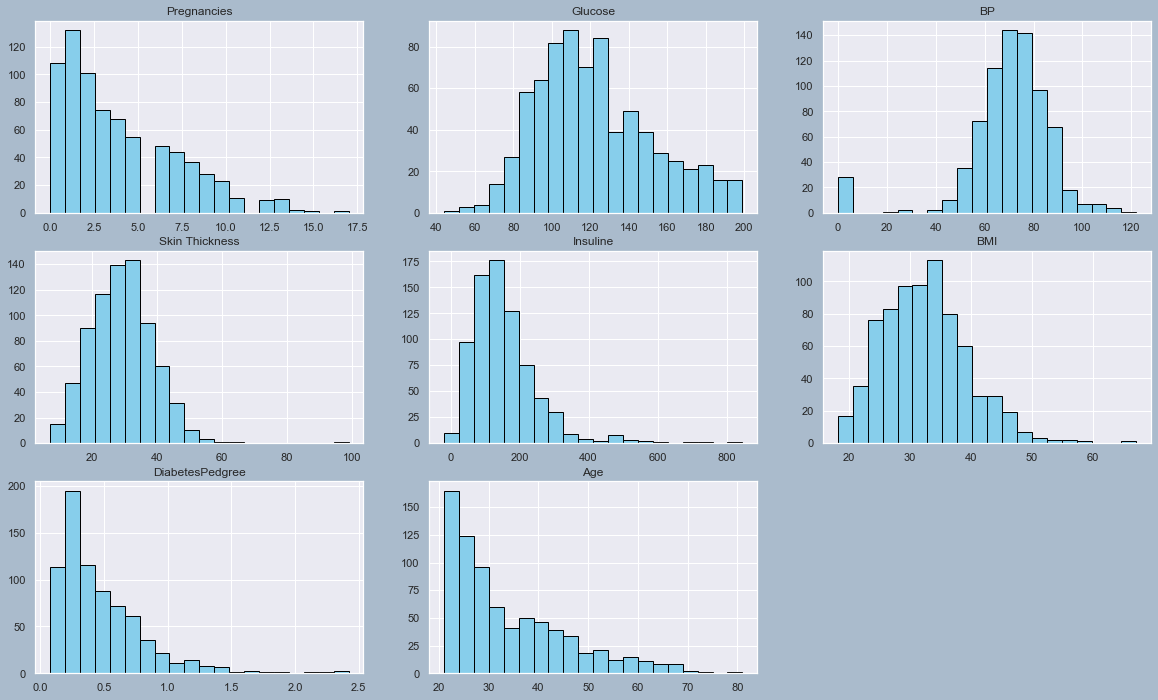

In [263]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

f1 = fig.add_subplot(grid[0,0])
f2 = fig.add_subplot(grid[0,1])
f3 = fig.add_subplot(grid[0,2])
f4 = fig.add_subplot(grid[1,0])
f5 = fig.add_subplot(grid[1,1])
f6 = fig.add_subplot(grid[1,2])
f7 = fig.add_subplot(grid[2,0])
f8 = fig.add_subplot(grid[2,1])


fig.patch.set_facecolor("#aabbcc")

f1.hist(df_imputer['Pregnancies'], bins = 20, ec="black", color = "skyblue")
f1.set_title("Pregnancies")
f2.hist(df_imputer['Glucose'], bins = 20, ec="black", color = "skyblue")
f2.set_title("Glucose")
f3.hist(df_imputer['BloodPressure'], bins = 20, ec="black", color = "skyblue")
f3.set_title("BP")
f4.hist(df_imputer['SkinThickness'], bins = 20, ec="black", color = "skyblue")
f4.set_title("Skin Thickness")
f5.hist(df_imputer['Insulin'], bins = 20, ec="black", color = "skyblue")
f5.set_title("Insuline")
f6.hist(df_imputer['BMI'], bins = 20, ec="black", color = "skyblue")
f6.set_title("BMI")
f7.hist(df_imputer['DiabetesPedigreeFunction'], bins = 20, ec="black", color = "skyblue")
f7.set_title("DiabetesPedgree")
f8.hist(df_imputer['Age'], bins = 20, ec="black", color = "skyblue")
f8.set_title("Age")


In [284]:
column_names = df_imputer.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df_imputer[df_imputer[name] == 0])))

Number of zeros in Pregnancies = 108
Number of zeros in Glucose = 0
Number of zeros in BloodPressure = 0
Number of zeros in SkinThickness = 0
Number of zeros in Insulin = 0
Number of zeros in BMI = 0
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 488
